# Подготовка

Подключим библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

Загрузим `csv`- файл.

In [2]:
data = pd.read_csv('ms_bucket.csv')

Проверим как загрузился файл.

In [3]:
data.head()

,timestamp,Inf,1,10,100,1000,10000,100000,110000,120000,...,40000,5,50,500,5000,50000,60000,70000,80000,90000
0,1564650000,88967916.0,56905292.0,72624894.0,88366166.0,88967203.0,88967824.0,88967916.0,88967916.0,88967916.0,...,88967916.0,69234222.0,87376013.0,88962228.0,88967673.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0
1,1564650300,88989154.0,56919502.0,72642881.0,88387255.0,88988441.0,88989062.0,88989154.0,88989154.0,88989154.0,...,88989154.0,69251570.0,87396803.0,88983465.0,88988911.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0
2,1564650600,89004769.0,56930005.0,72655984.0,88402809.0,89004056.0,89004677.0,89004769.0,89004769.0,89004769.0,...,89004769.0,69264172.0,87412166.0,88999080.0,89004526.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0
3,1564650900,89020289.0,56940760.0,72669292.0,88418257.0,89019576.0,89020197.0,89020289.0,89020289.0,89020289.0,...,89020289.0,69277029.0,87427447.0,89014598.0,89020046.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0
4,1564651200,89026526.0,56942467.0,72673669.0,88424408.0,89025813.0,89026434.0,89026526.0,89026526.0,89026526.0,...,89026526.0,69281089.0,87433403.0,89020835.0,89026283.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0


Удалим пропуски

In [4]:
data.dropna(inplace=True)

# Рассчет среднего времени и дисперсии

Отсортируем в `data` столбцы c порогами времени запроса.

In [5]:
# По условию, это все временные пороги
time_columns_list = list(data)[2:-1]
# Отсортируем по значению
time_columns_list.sort(key=int)
data[time_columns_list].head()

,1,2,3,4,5,10,20,30,40,50,...,20000,30000,40000,50000,60000,70000,80000,100000,110000,120000
0,56905292.0,62624703.0,67364370.0,68656945.0,69234222.0,72624894.0,82382694.0,85485163.0,86733464.0,87376013.0,...,88967898.0,88967909.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0
1,56919502.0,62639578.0,67380990.0,68674144.0,69251570.0,72642881.0,82402317.0,85505452.0,86754083.0,87396803.0,...,88989136.0,88989147.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0
2,56930005.0,62650737.0,67393096.0,68686606.0,69264172.0,72655984.0,82416791.0,85520424.0,86769304.0,87412166.0,...,89004751.0,89004762.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0
3,56940760.0,62662000.0,67405507.0,68699385.0,69277029.0,72669292.0,82431298.0,85535376.0,86784475.0,87427447.0,...,89020271.0,89020282.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0
4,56942467.0,62664298.0,67409098.0,68703350.0,69281089.0,72673669.0,82436566.0,85541023.0,86790298.0,87433403.0,...,89026508.0,89026519.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0


Добавим дату (в удобном формате):

In [6]:
# Восползуемся библиотекой datetime
date_str_column = data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))

data.insert(loc = 2, column='date',
            value=pd.to_datetime(date_str_column).apply(lambda x: x.date()),
            allow_duplicates=True)

In [7]:
data.head()

,timestamp,Inf,date,1,10,100,1000,10000,100000,110000,...,40000,5,50,500,5000,50000,60000,70000,80000,90000
0,1564650000,88967916.0,2019-08-01,56905292.0,72624894.0,88366166.0,88967203.0,88967824.0,88967916.0,88967916.0,...,88967916.0,69234222.0,87376013.0,88962228.0,88967673.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0
1,1564650300,88989154.0,2019-08-01,56919502.0,72642881.0,88387255.0,88988441.0,88989062.0,88989154.0,88989154.0,...,88989154.0,69251570.0,87396803.0,88983465.0,88988911.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0
2,1564650600,89004769.0,2019-08-01,56930005.0,72655984.0,88402809.0,89004056.0,89004677.0,89004769.0,89004769.0,...,89004769.0,69264172.0,87412166.0,88999080.0,89004526.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0
3,1564650900,89020289.0,2019-08-01,56940760.0,72669292.0,88418257.0,89019576.0,89020197.0,89020289.0,89020289.0,...,89020289.0,69277029.0,87427447.0,89014598.0,89020046.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0
4,1564651200,89026526.0,2019-08-01,56942467.0,72673669.0,88424408.0,89025813.0,89026434.0,89026526.0,89026526.0,...,89026526.0,69281089.0,87433403.0,89020835.0,89026283.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0


Выберем нужные колонки в "хорошем" формате.

In [8]:
data = data[['date'] + ['Inf'] + time_columns_list]

In [9]:
data.head()

,date,Inf,1,2,3,4,5,10,20,30,...,20000,30000,40000,50000,60000,70000,80000,100000,110000,120000
0,2019-08-01,88967916.0,56905292.0,62624703.0,67364370.0,68656945.0,69234222.0,72624894.0,82382694.0,85485163.0,...,88967898.0,88967909.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0,88967916.0
1,2019-08-01,88989154.0,56919502.0,62639578.0,67380990.0,68674144.0,69251570.0,72642881.0,82402317.0,85505452.0,...,88989136.0,88989147.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0,88989154.0
2,2019-08-01,89004769.0,56930005.0,62650737.0,67393096.0,68686606.0,69264172.0,72655984.0,82416791.0,85520424.0,...,89004751.0,89004762.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0,89004769.0
3,2019-08-01,89020289.0,56940760.0,62662000.0,67405507.0,68699385.0,69277029.0,72669292.0,82431298.0,85535376.0,...,89020271.0,89020282.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0,89020289.0
4,2019-08-01,89026526.0,56942467.0,62664298.0,67409098.0,68703350.0,69281089.0,72673669.0,82436566.0,85541023.0,...,89026508.0,89026519.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0,89026526.0


Просуммируем данные по датам и отсортируем по датам

In [10]:
data = data.groupby(by='date')[['Inf'] + time_columns_list].sum()
data.sort_values(by ='date', inplace=True)

In [11]:
data.head()

,Inf,1,2,3,4,5,10,20,30,40,...,20000,30000,40000,50000,60000,70000,80000,100000,110000,120000
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,1.293299e+10,8.254813e+09,9.089070e+09,9.782408e+09,9.971979e+09,1.005619e+10,1.054979e+10,1.196996e+10,1.242275e+10,1.260531e+10,...,1.293298e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10
2019-08-02,2.752902e+10,1.735231e+10,1.913432e+10,2.059571e+10,2.101255e+10,2.120149e+10,2.227290e+10,2.533200e+10,2.634311e+10,2.676102e+10,...,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10
2019-08-03,3.030429e+10,1.887780e+10,2.085024e+10,2.248011e+10,2.296078e+10,2.317808e+10,2.437507e+10,2.777825e+10,2.892889e+10,2.941163e+10,...,3.030428e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10
2019-08-04,3.273038e+10,2.028905e+10,2.242496e+10,2.424057e+10,2.477434e+10,2.501268e+10,2.630926e+10,2.999397e+10,3.123748e+10,3.176123e+10,...,3.273037e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10
2019-08-05,3.446665e+10,2.141455e+10,2.369875e+10,2.558729e+10,2.614149e+10,2.638994e+10,2.774816e+10,3.161590e+10,3.291156e+10,3.345641e+10,...,3.446664e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10


Преобразуем таблицу. Разобьём измерения времени выполнения запроса на промежутки по "барьерам". Будем считать, что в промежутке находятся запросы, время выполнения которых соответствует середине интервала. 

In [20]:
last_added_border = int(time_columns_list[0])
time_counts = pd.DataFrame({ last_added_border/2 : data[time_columns_list[0]]})

#time_counts
for i in range(1, len(time_columns_list)):
    curr_border = int(time_columns_list[i])
    cases_cnt = (data[time_columns_list[i]] - data[time_columns_list[i-1]])/2
    time_counts[str((curr_border+last_added_border)/2)] = cases_cnt
    last_added_border = curr_border
    
time_counts.head()


,0.5,1.5,2.5,3.5,4.5,7.5,15.0,25.0,35.0,45.0,...,15000.0,25000.0,35000.0,45000.0,55000.0,65000.0,75000.0,90000.0,105000.0,115000.0
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,8.254813e+09,4.171282e+08,346669114.0,94785628.5,42107569.0,246797147.0,7.100856e+08,226395341.0,91280637.0,47059088.0,...,5344.5,792.0,504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-02,1.735231e+10,8.910074e+08,730693063.0,208423524.5,94467198.5,535704668.0,1.529553e+09,505554794.0,208955922.5,109375105.0,...,15171.0,1985.0,1008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-03,1.887780e+10,9.862182e+08,814934486.0,240336219.0,108650253.5,598496038.0,1.701588e+09,575322212.5,241370496.5,127270049.0,...,17192.0,2160.0,1008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-04,2.028905e+10,1.067954e+09,907807271.0,266885191.5,119168655.0,648290183.0,1.842357e+09,621751218.5,261877159.5,138433305.5,...,17280.0,2160.0,1008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-05,2.141455e+10,1.142098e+09,944270065.5,277098953.0,124228178.0,679109320.0,1.933870e+09,647828299.5,272424669.0,144396924.5,...,17280.0,2160.0,1008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Посчитаем среднее

In [13]:
data['avg'] = [0] * len(data)

for i in list(time_counts):
    data['avg'] = data['avg'] + float(i) * time_counts[i]
    
data['avg'] = data['avg'] / data[time_columns_list[-1]]
data.head()

,Inf,1,2,3,4,5,10,20,30,40,...,30000,40000,50000,60000,70000,80000,100000,110000,120000,avg
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,1.293299e+10,8.254813e+09,9.089070e+09,9.782408e+09,9.971979e+09,1.005619e+10,1.054979e+10,1.196996e+10,1.242275e+10,1.260531e+10,...,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,3.321186
2019-08-02,2.752902e+10,1.735231e+10,1.913432e+10,2.059571e+10,2.101255e+10,2.120149e+10,2.227290e+10,2.533200e+10,2.634311e+10,2.676102e+10,...,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,3.499485
2019-08-03,3.030429e+10,1.887780e+10,2.085024e+10,2.248011e+10,2.296078e+10,2.317808e+10,2.437507e+10,2.777825e+10,2.892889e+10,2.941163e+10,...,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.608130
2019-08-04,3.273038e+10,2.028905e+10,2.242496e+10,2.424057e+10,2.477434e+10,2.501268e+10,2.630926e+10,2.999397e+10,3.123748e+10,3.176123e+10,...,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.616238
2019-08-05,3.446665e+10,2.141455e+10,2.369875e+10,2.558729e+10,2.614149e+10,2.638994e+10,2.774816e+10,3.161590e+10,3.291156e+10,3.345641e+10,...,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.587775


Посчитаем дисперсию как средний квадрат отклонения от среднего.

In [14]:
data['disp'] = [0] * len(data)

for i in list(time_counts):
    data['disp'] = data['disp'] + ((float(i) - data['avg'])**2) * time_counts[i]
    
data['disp'] = data['disp'] / data[time_columns_list[-1]]
data.head()

,Inf,1,2,3,4,5,10,20,30,40,...,40000,50000,60000,70000,80000,100000,110000,120000,avg,disp
date,,,,,,,,,,,,,,,,,,,,,
2019-08-01,1.293299e+10,8.254813e+09,9.089070e+09,9.782408e+09,9.971979e+09,1.005619e+10,1.054979e+10,1.196996e+10,1.242275e+10,1.260531e+10,...,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,1.293299e+10,3.321186,424.063873
2019-08-02,2.752902e+10,1.735231e+10,1.913432e+10,2.059571e+10,2.101255e+10,2.120149e+10,2.227290e+10,2.533200e+10,2.634311e+10,2.676102e+10,...,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,2.752902e+10,3.499485,491.165564
2019-08-03,3.030429e+10,1.887780e+10,2.085024e+10,2.248011e+10,2.296078e+10,2.317808e+10,2.437507e+10,2.777825e+10,2.892889e+10,2.941163e+10,...,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.030429e+10,3.608130,504.557714
2019-08-04,3.273038e+10,2.028905e+10,2.242496e+10,2.424057e+10,2.477434e+10,2.501268e+10,2.630926e+10,2.999397e+10,3.123748e+10,3.176123e+10,...,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.273038e+10,3.616238,485.743192
2019-08-05,3.446665e+10,2.141455e+10,2.369875e+10,2.558729e+10,2.614149e+10,2.638994e+10,2.774816e+10,3.161590e+10,3.291156e+10,3.345641e+10,...,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.446665e+10,3.587775,471.121472


# Построение графика

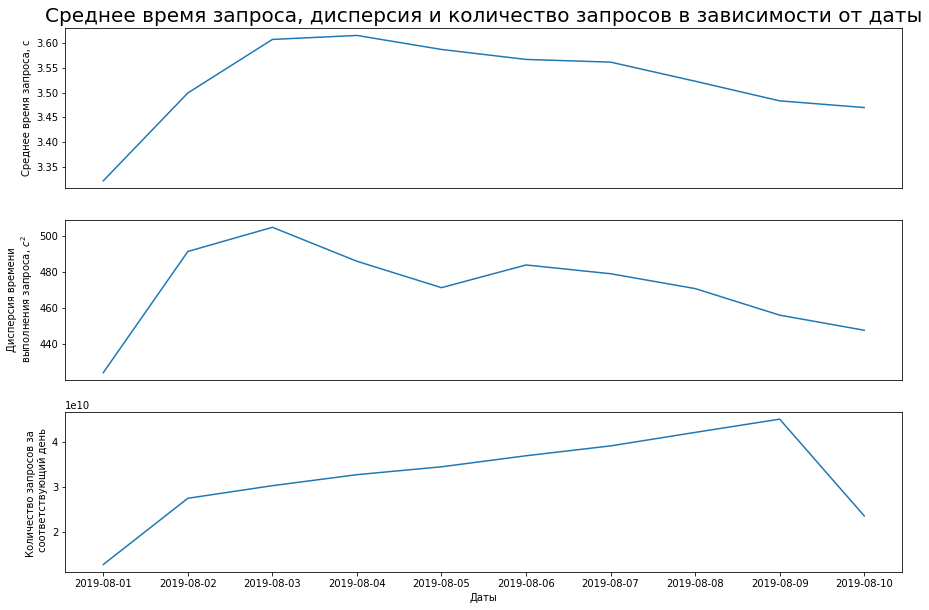

In [25]:
fig = plt.figure(figsize=(15, 10))

# Заголовок

# График среднего
avg_ax = plt.subplot(3, 1, 1)
avg_ax.plot(data.index.values, data['avg'])
plt.xticks([])

plt.title(label="Среднее время запроса, дисперсия и количество запросов в зависимости от даты", fontsize=20)
avg_ax.set_ylabel("Среднее время запроса, c", color="black")

# График дисперсии
disp_ax = plt.subplot(3, 1, 2)
disp_ax.plot(data.index.values, data['disp'])
plt.xticks([])
disp_ax.set_ylabel("Дисперсия времени\n выполнения запроса, $с^2$", color="black")

# График количества запросов для каждого дня
cnt_ax = plt.subplot(3, 1, 3)
cnt_ax.plot(data.index.values, data['Inf'])
cnt_ax.set_ylabel("Количество запросов за \n соответствующий день")

cnt_ax.set_xlabel("Даты")

plt.show()